<a href="https://colab.research.google.com/github/blkzen/TaiwanBankruptcyPredictor/blob/main/Taiwan_Bankruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [15]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression

# Data Input

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Taiwan Bankruptcy/TaiBankrupt.csv')
df = pd.DataFrame(data=data)

# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Our data is all clean.

# Exploratory Data Analysis

In [8]:
df.shape

(6819, 96)

In [9]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

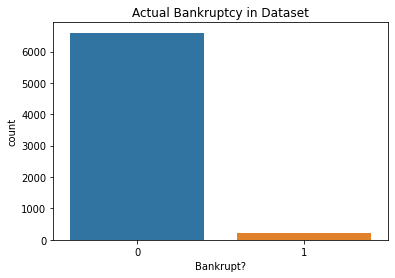

In [10]:
plt.title('Actual Bankruptcy in Dataset')
sns.countplot(x=df['Bankrupt?'])


## Modeling

In [11]:
X=df.drop(labels=['Bankrupt?'], axis=1)
y=df['Bankrupt?']

In [12]:
feat_select=SelectKBest(f_classif,k=50).fit(X,y)
top50feat=X.columns[feat_select.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [93] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Standardization

In [17]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.75)

## Logistic Regression

In [18]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
log_reg.score(X_test,y_test)

0.9622678396871945

In [20]:
y_pred=log_reg.predict(X_test)